# Getting started with `sbi`

Note, you can find the original version of this notebook at [https://github.com/mackelab/sbi/blob/main/tutorials/00_getting_started.ipynb](https://github.com/mackelab/sbi/blob/main/tutorials/00_getting_started.ipynb) in the `sbi` repository.

In [1]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

## Running the inference procedure

`sbi` provides a simple interface to run state-of-the-art algorithms for simulation-based inference.

For inference, you need to provide two ingredients:

1) a prior distribution that allows to sample parameter sets.  
2) a simulator that takes parameter sets and produces simulation outputs.

For example, we can have a 3-dimensional parameter space with a uniform prior between [-1,1] and a simple simulator that for the sake of example adds 1.0 and some Gaussian noise to the parameter set:

In [2]:
num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), high=2*torch.ones(num_dim))

def simulator(parameter_set):
    return 1.0 + parameter_set + torch.randn(parameter_set.shape) * 0.1

`sbi` can then run inference:

In [3]:
posterior = infer(simulator, prior, method='SNPE', num_simulations=1000)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 119 epochs.

Let's say we have made some observation $x$:

In [4]:
observation = torch.zeros(3)

 Given this observation, we can then sample from the posterior $p(\theta|x)$, evaluate its log-probability, or plot it.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

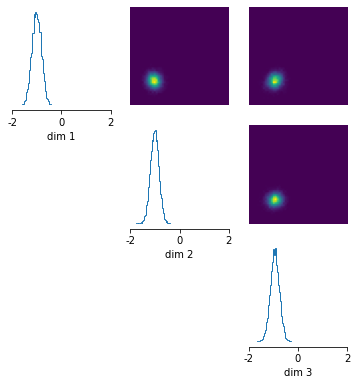

In [5]:
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[-2,2],[-2,2],[-2,2]], figsize=(6,6))

## Next steps

The single-line interface described above provides an easy entry for using `sbi`. However, if you are working on a larger project or need additional features, we strongly recommend using the [flexible interface](https://www.mackelab.org/sbi/tutorial/02_flexible_interface/).

## Requirements for the simulator, prior, and observation

In the interface described above, you need to provide a prior and a simulator for training. Let's talk about what requirements they need to satisfy.


### Prior
A prior is a distribution object that allows to sample parameter sets. Any class for the prior is allowed as long as it allows to call `prior.sample()` and `prior.log_prob()`.

### Simulator
The simulator is a Python callable that takes in a parameter set and outputs data with some (even if very small) stochasticity.

Allowed data types and shapes for input and output:

- the input parameter set and the output have to be either a `np.ndarray` or a `torch.Tensor`. 
- the input parameter set should have either shape `(1,N)` or `(N)`, and the output must have shape `(1,M)` or `(M)`.

You can call simulators not written in Python as long as you wrap them in a Python function.

### Observation
Once you have a trained posterior, you will want to evaluate or sample the posterior $p(\theta|x_o)$ at certain observed values $x_o$:

- The allowable data types are either Numpy `np.ndarray` or a torch `torch.Tensor`.
- The shape must be either `(1,M)` or just `(M)`.

## Running different algorithms

`sbi` implements three classes of algorithms that can be used to obtain the posterior distribution: SNPE, SNLE, and SNRE. You can try the different algorithms by simply swapping out the `method`:

In [ ]:
posterior = infer(simulator, prior, method='SNPE', num_simulations=1000)
posterior = infer(simulator, prior, method='SNLE', num_simulations=1000)
posterior = infer(simulator, prior, method='SNRE', num_simulations=1000)

You can then infer, sample, evaluate, and plot the posterior as described above.